Hosein Seifi<br>
810100386

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from os import walk
mypath = '/content/drive/MyDrive/ML_HW1_Data/image/'
images = next(walk(mypath), (None, None, []))[2]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import imageio as iio
import numpy as np
data = [np.array(iio.imread(mypath+name)) for name in images]
labels = [name[0] for name in images]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)

In [ ]:
def extract_feature(X):
  X_f = list()
  for pic in X:
    sample = list()
    for i in range(3):
      sample.append(np.mean(pic[:,:,i]))
      #sample.append(np.min(pic[:,:,i]))
      sample.append(np.max(pic[:,:,i]))
      #sample.append(np.std(pic[:,:,i]))
    X_f.append(sample)
  return X_f

In [ ]:
X_train_f = extract_feature(X_train)
X_test_f = extract_feature(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(X_train_f, y_train)

In [ ]:
pred = model.predict(X_test_f)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, pred)

In [ ]:
for line in cr.split('\n'):
  print(line)

              precision    recall  f1-score   support

           j       1.00      0.90      0.95        10
           s       0.92      1.00      0.96        11

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[ 9  1]
 [ 0 11]]


True label:  j


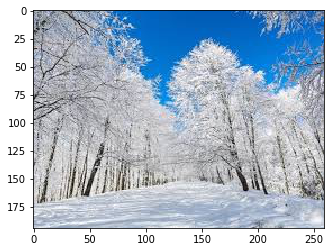

In [ ]:
from matplotlib import pyplot as plt
for i in range(len(pred)):
  if not pred[i] == y_test[i]:
    plt.imshow(X_test[i], interpolation='nearest')
    print("True label: ", y_test[i])
    plt.show()